# Climate Change Challenge (Twitter Analysis

Team: Menzi Mchunu, Lucas Sithole, Nthabeleng Vilakazi, Sizwe Bhembe, Mbuso Biyela and Sibusiso Luthuli

[[](http://)](http://) Table of Contents

1. [Introduction](#intro) 
 * Project Description
 * Problem Statement
 * Datasets and Variables
 
2. [Import Libraries and Data](#imports)

3. [Data Evaluation and Data Cleaning](#data)
 * Checking Summary Statistics of all Data
 * Exploring Emojis
 * Removing Twitter Handles
 * Lower Casing the Text
 * Removing Links and Retweet Symbol (RT)
 * Removing Stopwords
 * Tokenization and Lemmatization

4. [Exploratory Data Analysis](#eda)
 * Checking for Imbalance in Sentiment Data
 * Checking Relationship between Text Length and Sentiment
 * Understanding Common Words in Tweets
 * Understanding Relationship of Hashtags and Sentiment of Tweet
 * Visualizing Tweets with Word2Vec and t-SNE
 * Understanding Relationship Between Hashtags and Sentiment Of Tweet
 
5. [Data Preprocessing](#preprocessing)
 
6. [Modelling](#modelling)
  * Linear Support Vector
  * Logistic Regression
  * K-Nearest Neighbours
  * Random Forest
  * Decision Tree
  
7. [Performance Evaluation](#evaluation)
  * Compare Models on Performance Metrics
  * Evaluate Models By Cross Validation
  
8. [Model Analysis](#analysis)

9. [Conclusion](#conclusion)

10. [Save Model and Output](#save)


<a id="intro"></a>
# 1. Introduction
## Project Description
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA has challenged us during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

## Problem Statement
Build a machine learning model that will classify if people believe in climate change based on their tweets in other to improve and make castomer base products.

##  Data Description (Datasets and Variables)
The data provided was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected.

Each tweet is labelled as one of the following classes:
   *  **2**: News(the tweet links to factual news about climate change)
   *  **1**: Pro(the tweet supports the belief of man-made climate change)
   *  **0**: Neutral(the tweet neither supports nor refutes the belief of man-made climate change)
   * **-1**: Anti(the tweet does not believe in man-made climate change)
   
Datasets provided:
* **train.csv**: The dataset that will be used to train our model.
* **test.csv**: The dataset to which we will apply our model.

Variable Definition:
* **sentiment**: Sentiment of tweet
* **message**: Tweet body
* **tweetid**: Twitter unique id

Please note that you'll have to install/download the following before running this notebook:
* pip install emoji
* pip install demoji
* genism
* nltk 
* pip install wordcloud

In [2]:
!pip install emoji 

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=1119e6a247d10c4943e361475d106b25ba0769901ec30fa0e2ec43ba5ff4614d
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [3]:
!pip install demoji

<a id="imports"></a>
# 2. Import Libraries and Data
List of libralies and dataset that are going to be needed for the project, some will be imported as we move along

In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import emoji as emoj
import demoji

from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report,accuracy_score, log_loss, make_scorer, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import LinearSVC
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from emoji import UNICODE_EMOJI
from gensim import models
from gensim.models import word2vec
from sklearn.manifold import TSNE
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn import metrics

demoji.download_codes()
sns.set_style('white')
%matplotlib inline

... OK (Got response in 0.11 seconds)


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Writing emoji data to /root/.demoji/codes.json ...
... OK


## Load Data

In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [9]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [10]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="data"></a>
# 3. Data Evaluation and Data Cleaning
## Checking Summary Statistics of all the Data

In [11]:
print(df_train.shape)
print(df_test.shape)

(15819, 3)
(10546, 2)


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [14]:
df_train[['message']].describe()

,message
count,15819
unique,14229
top,RT @StephenSchlegel: she's thinking about how ...
freq,307


In [15]:
df_test[['message']].describe()

,message
count,10546
unique,9575
top,RT @StephenSchlegel: she's thinking about how ...
freq,199


Both the test data and train data have no missing values. The training set and testing set have 14229 and 9575 unique tweets respectively. The most common tweet found in both dataset is 'RT @StephenSchlegel: she's thinking about how ... ' , this makes sense because it's a retweet.

## Exploring Emojis

Emojis have become part of everyday language and we suspect that the use of an emoji affects the sentiment of the tweet. Here, we explore the emojis found in both datasets and change them to text with functions below. We will then use this information to build our models.

* ###  Finding Rows with emojis for both train and test dataset

In [16]:
def text_has_emoji(text):
    """This function checks all the rows of data to see if we have any emojis in the tweet """
    for character in text:
        if character in emoj.UNICODE_EMOJI:
            return True
    return False
"""We apply the above function to check for emojis"""
df_train['emoji'] = df_train['message'].apply(text_has_emoji)
df_test['emoji'] = df_test['message'].apply(text_has_emoji)

In [17]:
df_train[df_train['emoji'] == True]

,sentiment,message,tweetid,emoji
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...,911385,True
121,-1,@TomiLahren kinda funny the professors talk sh...,740194,True
209,0,They asked me what my inspiration was- I told ...,797850,True
230,1,RT @AdrianGeoLopez: People still don't believe...,960037,True
488,1,RT @DomRKing: you're honestly dumb as hell if ...,794085,True
...,...,...,...,...
15506,2,RT @pash22: Climate chnge sceptics suffer blow...,506101,True
15669,1,😠 SIGN to restore &amp; maintain accurate scie...,412158,True
15671,0,@ViaPalma15 mutert krokodille. Må være global ...,893828,True
15695,1,RT @JohnZajaros: We need a statement about cli...,182749,True


In [18]:
df_test[df_test['emoji'] == True]

,message,tweetid,emoji
98,I just want to save the planet 😔 climate chang...,693559,True
121,RT @BitsieTulloch: Happy Ã°Å¸â€™â‚¬Ã°Å¸Å½Æ’Ã°Å...,933443,True
133,No shortcuts! Fight climate change for real. G...,447977,True
146,I'm wearing a flight jacket in February in NYC...,914599,True
177,RT @NishaCarelse: I have a soft spot for anima...,689136,True
...,...,...,...
10199,@touchofgrey9 ⚡️ “Apocalypse bunker for seeds ...,981674,True
10261,RT @alyshanett: 92 degrees in November... da f...,327332,True
10316,RT @MissLizzyNJ: Blizzard Warning: A bunch of ...,128752,True
10378,RT @Tomleewalker: u talking about tackling cli...,527515,True


We see above that the train data has 182 row that contain emojis while the test data has 120 rows.

* ###  Extract All The Emojis In The Dataframe

In [19]:
def extra_all_the_emoji(strings):
    """This function extracts the emojis for every row in the dataframe"""
    return ''.join(character for character in strings if character in emoj.UNICODE_EMOJI)

In [20]:
#We apply the extra_all_the_emoji function to the message column
"""We see all the emojis in the train dataframe """
df_train['emojis'] = df_train['message'].apply(extra_all_the_emoji)
df_train[df_train['emojis'] != '']['emojis']

56       😂❄❄🤦♂
121          🤔
209       😂🔥🌎❄
230          ♂
488         🙄🙄
         ...  
15506        ⬆
15669        😠
15671        😄
15695        ⚡
15723        😨
Name: emojis, Length: 182, dtype: object

In [21]:
"""We see all the emojis in the train dataframe """
df_test['emojis'] = df_test['message'].apply(extra_all_the_emoji)
df_test[df_test['emojis'] != '']['emojis']

98              😔
121             ™
133             ™
146           🤷🏻♀
177      🐼🐻🐝🐠🐚🌷🍀🌎
           ...   
10199           ⚡
10261           ™
10316         ❄❄❄
10378          ▶▶
10480          👍🏼
Name: emojis, Length: 120, dtype: object

In [22]:
#The list of all emojis in the train data
list_of_emojis_train = df_train[df_train['emojis'] != '']['emojis'].tolist()

In [23]:
#The list of all emojis in the test data
list_of_emojis_test = df_test[df_test['emojis'] != '']['emojis'].tolist()

In [24]:
#We loop through the whole list to change every emoji to text in the train data
changed_emoji_to_text_train = []
for emojis in list_of_emojis_train:
    changed_emoji_to_text_train.append(emoj.demojize(emojis, delimiters=("", "")))
changed_emoji_to_text_train   

['face_with_tears_of_joysnowflakesnowflakeperson_facepalmingmale_sign',
 'thinking_face',
 'face_with_tears_of_joyfireglobe_showing_Americassnowflake',
 'male_sign',
 'face_with_rolling_eyesface_with_rolling_eyes',
 'raised_fist',
 'face_with_tears_of_joyface_with_tears_of_joy',
 'upside-down_face',
 'expressionless_facesnowflake',
 'trade_mark',
 'thinking_face',
 'flushed_faceflushed_faceflushed_faceface_with_rolling_eyesface_with_rolling_eyes',
 'snowflake',
 'thinking_face',
 'umbrella_with_rain_drops',
 'copyright',
 'trade_mark',
 'trade_mark',
 'high_voltage',
 'thinking_facethinking_facethinking_face',
 'unamused_facethumbs_down_light_skin_toneglobe_showing_Europe-Africawinking_face_with_tonguefolded_hands_light_skin_tonesmiling_face_with_halo',
 'clapping_hands_medium_skin_toneclapping_hands_medium_skin_toneclapping_hands_medium_skin_tone',
 'globe_showing_Europe-Africaskull',
 'United_StatesUnited_Statesperson_raising_hand_medium-light_skin_toneglobe_showing_Americaspistolpre

In [25]:
#We loop through the whole list to change every emoji to text in the train data
changed_emoji_to_text_test = []
for emojis in list_of_emojis_test:
    changed_emoji_to_text_test.append(emoj.demojize(emojis, delimiters=("", "")))
changed_emoji_to_text_test

['pensive_face',
 'trade_mark',
 'trade_mark',
 'person_shrugging_light_skin_tonefemale_sign',
 'panda_facebear_facehoneybeetropical_fishspiral_shelltulipfour_leaf_cloverglobe_showing_Americas',
 'backhand_index_pointing_downbackhand_index_pointing_down',
 'snowflake',
 'face_with_tears_of_joyface_with_tears_of_joy',
 'backhand_index_pointing_downbackhand_index_pointing_downbackhand_index_pointing_down',
 'play_button',
 'telephone',
 'confused_face',
 'face_with_tears_of_joy',
 'face_with_tears_of_joy',
 'heart_suit',
 'face_with_rolling_eyes',
 'face_with_tears_of_joyface_with_tears_of_joy',
 'right_arrow',
 'face_with_tears_of_joy',
 'trade_mark',
 'party_popperthinking_faceface_with_tears_of_joyface_with_tears_of_joy',
 'thinking_face',
 'thumbs_up',
 'trade_mark',
 'smirking_face',
 'index_pointing_up',
 'question_markquestion_markquestion_markquestion_markquestion_mark',
 'grimacing_face',
 'right_arrow',
 'face_with_tears_of_joy',
 'grinning_face_with_sweatgrinning_squinting_fac

**Now that we've changed the emojis to text in a list we change them in the dataframe using the function below.**

In [26]:
def emojis_to_text(text):
    """This function changes all the emojis in the message column into words"""
    return emoj.demojize(text, delimiters=("", ""))
df_train['message'] = df_train['message'].apply(emojis_to_text)
df_test['message'] = df_test['message'].apply(emojis_to_text)

## Removing Twitter Handles

In [27]:
def remove_twitter_handles(tweet, pattern):
    """This function removes all the twitter handles on the dataframe"""
    r = re.findall(pattern, tweet)
    for text in r:
        tweet = re.sub(text, '', tweet)
    return tweet

df_train['clean_tweet'] = np.vectorize(remove_twitter_handles)(df_train['message'], "@[\w]*") 
df_test['clean_tweet'] = np.vectorize(remove_twitter_handles)(df_test['message'], "@[\w]*") 

In [28]:
df_train.head()

,sentiment,message,tweetid,emoji,emojis,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,False,,PolySciMajor EPA chief doesn't think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,False,,It's not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,False,,RT : Researchers say we have three years to ac...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,False,,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,False,,"RT : It's 2016, and a racist, sexist, climate ..."


In [29]:
df_test.head()

,message,tweetid,emoji,emojis,clean_tweet
0,Europe will now be looking to China to make su...,169760,False,,Europe will now be looking to China to make su...
1,Combine this with the polling of staffers re c...,35326,False,,Combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,False,,"The scary, unimpeachable evidence that climate..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,False,,\nPutin got to you too Jill ! \nTrump does...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,False,,RT : 'Female orgasms cause global warming!'\n-...


## Lower Casing the Text

In [30]:
# Lower Casing clean_tweet
df_train['clean_tweet']  = df_train['clean_tweet'].str.lower()
df_train.head()

,sentiment,message,tweetid,emoji,emojis,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,False,,polyscimajor epa chief doesn't think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,False,,it's not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,False,,rt : researchers say we have three years to ac...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,False,,#todayinmaker# wired : 2016 was a pivotal year...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,False,,"rt : it's 2016, and a racist, sexist, climate ..."


In [31]:
# Lower Casing clean_tweet
df_test['clean_tweet']  = df_test['clean_tweet'].str.lower()
df_test.head()

,message,tweetid,emoji,emojis,clean_tweet
0,Europe will now be looking to China to make su...,169760,False,,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,False,,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,False,,"the scary, unimpeachable evidence that climate..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,False,,\nputin got to you too jill ! \ntrump does...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,False,,rt : 'female orgasms cause global warming!'\n-...


## Removing Links and Retweet Symbol (RT)

In [32]:
#Links for train data
tweets = []
new = list(df_train['clean_tweet'])
for tweet in new:
    tweet = re.sub(r"http\S+", '', tweet, flags=re.MULTILINE)
    tweets.append(tweet)
    
df_train['clean_tweet'] = tweets

#Links for test data
test_tweets = []
new1 = list(df_test['clean_tweet'])
for tweet in new1:
    tweet = re.sub(r"http\S+", '', tweet, flags=re.MULTILINE)
    test_tweets.append(tweet)
    
df_test['clean_tweet'] = test_tweets


#Retweets for train data
tweets = []
new = list(df_train['clean_tweet'])
for tweet in new:
    tweet = re.sub("rt :", '', tweet, flags=re.MULTILINE)
    tweets.append(tweet)
    
df_train['clean_tweet'] = tweets


#Retweets test data
test_tweets = []
new1 = list(df_test['clean_tweet'])
for tweet in new1:
    tweet = re.sub("rt :", '', tweet, flags=re.MULTILINE)
    test_tweets.append(tweet)
    
df_test['clean_tweet'] = test_tweets

## Removing Stopwords

Stop words are commonly used words in text such as "a", "an", "the". Since we are attempting to classify text into different classes, we'll remove stop words from the text in order to give more focus to the words that give the text meaning. 

In [49]:
stop_words = nltk.corpus.stopwords.words('english')

In [50]:
df_train['tidy_tweet'] = df_train['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
df_test['tidy_tweet'] = df_test['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

In [51]:
df_train.head()

,sentiment,message,tweetid,emoji,emojis,clean_tweet,tidy_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,False,,polyscimajor epa chief doesn't think carbon di...,polyscimajor epa chief think carbon dioxide ma...
1,1,It's not like we lack evidence of anthropogeni...,126103,False,,it's not like we lack evidence of anthropogeni...,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,False,,researchers say we have three years to act on...,researchers say three years act climate change...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,False,,#todayinmaker# wired : 2016 was a pivotal year...,#todayinmaker# wired : 2016 pivotal year war c...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,False,,"it's 2016, and a racist, sexist, climate chan...","2016, racist, sexist, climate change denying b..."


In [52]:
df_test.head()

,message,tweetid,emoji,emojis,clean_tweet,tidy_tweet
0,Europe will now be looking to China to make su...,169760,False,,europe will now be looking to china to make su...,europe looking china make sure alone fighting ...
1,Combine this with the polling of staffers re c...,35326,False,,combine this with the polling of staffers re c...,combine polling staffers climate change womens...
2,"The scary, unimpeachable evidence that climate...",224985,False,,"the scary, unimpeachable evidence that climate...","scary, unimpeachable evidence climate change a..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,False,,\nputin got to you too jill ! \ntrump does...,putin got jill ! trump believe climate change ...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,False,,'female orgasms cause global warming!'\n-sarc...,'female orgasms cause global warming!' -sarcas...


## Tokenization and Lemmatization

Tokenization is the process of splitting up a text into pieces such as words, symbols and other elements called tokens. These tokens are important as they are the base step for stemming and lemmatization (in our case, lemmatization).

Lemmatization returns the base or dictionary form of a word, by considering a language's full vocabulary.

In [53]:
#Tokenization
def tokenizing(text):
    """This Function breaks up text into tokens"""
    text = re.split('\W+', text)
    return text

df_train['tokenized_tweet'] = df_train['tidy_tweet'].apply(lambda x: tokenizing(x))
df_test['tokenized_tweet'] = df_test['tidy_tweet'].apply(lambda x: tokenizing(x))

In [54]:
df_train.head()

,sentiment,message,tweetid,emoji,emojis,clean_tweet,tidy_tweet,tokenized_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,False,,polyscimajor epa chief doesn't think carbon di...,polyscimajor epa chief think carbon dioxide ma...,"[polyscimajor, epa, chief, think, carbon, diox..."
1,1,It's not like we lack evidence of anthropogeni...,126103,False,,it's not like we lack evidence of anthropogeni...,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,False,,researchers say we have three years to act on...,researchers say three years act climate change...,"[researchers, say, three, years, act, climate,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,False,,#todayinmaker# wired : 2016 was a pivotal year...,#todayinmaker# wired : 2016 pivotal year war c...,"[, todayinmaker, wired, 2016, pivotal, year, w..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,False,,"it's 2016, and a racist, sexist, climate chan...","2016, racist, sexist, climate change denying b...","[2016, racist, sexist, climate, change, denyin..."


In [55]:
df_test.head()

,message,tweetid,emoji,emojis,clean_tweet,tidy_tweet,tokenized_tweet
0,Europe will now be looking to China to make su...,169760,False,,europe will now be looking to china to make su...,europe looking china make sure alone fighting ...,"[europe, looking, china, make, sure, alone, fi..."
1,Combine this with the polling of staffers re c...,35326,False,,combine this with the polling of staffers re c...,combine polling staffers climate change womens...,"[combine, polling, staffers, climate, change, ..."
2,"The scary, unimpeachable evidence that climate...",224985,False,,"the scary, unimpeachable evidence that climate...","scary, unimpeachable evidence climate change a...","[scary, unimpeachable, evidence, climate, chan..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,False,,\nputin got to you too jill ! \ntrump does...,putin got jill ! trump believe climate change ...,"[putin, got, jill, trump, believe, climate, ch..."
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,False,,'female orgasms cause global warming!'\n-sarc...,'female orgasms cause global warming!' -sarcas...,"[, female, orgasms, cause, global, warming, sa..."


In [58]:
#Lemmatization
tokens = df_train['tokenized_tweet']
tokens_test = df_test['tokenized_tweet']

lemmatizer = WordNetLemmatizer()

tokens = tokens.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokens_test = tokens_test.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

df_train['lemmatized_tweet'] = tokens
df_test['lemmatized_tweet'] = tokens_test

In [59]:
df_train.head()

,sentiment,message,tweetid,emoji,emojis,clean_tweet,tidy_tweet,tokenized_tweet,lemmatized_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,False,,polyscimajor epa chief doesn't think carbon di...,polyscimajor epa chief think carbon dioxide ma...,"[polyscimajor, epa, chief, think, carbon, diox...","[polyscimajor, epa, chief, think, carbon, diox..."
1,1,It's not like we lack evidence of anthropogeni...,126103,False,,it's not like we lack evidence of anthropogeni...,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,False,,researchers say we have three years to act on...,researchers say three years act climate change...,"[researchers, say, three, years, act, climate,...","[researcher, say, three, year, act, climate, c..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,False,,#todayinmaker# wired : 2016 was a pivotal year...,#todayinmaker# wired : 2016 pivotal year war c...,"[, todayinmaker, wired, 2016, pivotal, year, w...","[, todayinmaker, wired, 2016, pivotal, year, w..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,False,,"it's 2016, and a racist, sexist, climate chan...","2016, racist, sexist, climate change denying b...","[2016, racist, sexist, climate, change, denyin...","[2016, racist, sexist, climate, change, denyin..."


In [60]:
df_test.head()

,message,tweetid,emoji,emojis,clean_tweet,tidy_tweet,tokenized_tweet,lemmatized_tweet
0,Europe will now be looking to China to make su...,169760,False,,europe will now be looking to china to make su...,europe looking china make sure alone fighting ...,"[europe, looking, china, make, sure, alone, fi...","[europe, looking, china, make, sure, alone, fi..."
1,Combine this with the polling of staffers re c...,35326,False,,combine this with the polling of staffers re c...,combine polling staffers climate change womens...,"[combine, polling, staffers, climate, change, ...","[combine, polling, staffer, climate, change, w..."
2,"The scary, unimpeachable evidence that climate...",224985,False,,"the scary, unimpeachable evidence that climate...","scary, unimpeachable evidence climate change a...","[scary, unimpeachable, evidence, climate, chan...","[scary, unimpeachable, evidence, climate, chan..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,False,,\nputin got to you too jill ! \ntrump does...,putin got jill ! trump believe climate change ...,"[putin, got, jill, trump, believe, climate, ch...","[putin, got, jill, trump, believe, climate, ch..."
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,False,,'female orgasms cause global warming!'\n-sarc...,'female orgasms cause global warming!' -sarcas...,"[, female, orgasms, cause, global, warming, sa...","[, female, orgasm, cause, global, warming, sar..."


***Drop columns that will not be used***

In [61]:
df_train = df_train.drop(['tidy_tweet'],axis=1)
df_train = df_train.drop(['tokenized_tweet'], axis=1)
df_train = df_train.drop(['emoji'],axis=1)
df_train = df_train.drop(['emojis'], axis=1)

df_test = df_test.drop(['tidy_tweet'],axis=1)
df_test = df_test.drop(['tokenized_tweet'], axis=1)
df_test = df_test.drop(['emoji'],axis=1)
df_test = df_test.drop(['emojis'], axis=1)

In [62]:
df_train.head()

,sentiment,message,tweetid,clean_tweet,lemmatized_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn't think carbon di...,"[polyscimajor, epa, chief, think, carbon, diox..."
1,1,It's not like we lack evidence of anthropogeni...,126103,it's not like we lack evidence of anthropogeni...,"[like, lack, evidence, anthropogenic, global, ..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,researchers say we have three years to act on...,"[researcher, say, three, year, act, climate, c..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wired : 2016 was a pivotal year...,"[, todayinmaker, wired, 2016, pivotal, year, w..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"it's 2016, and a racist, sexist, climate chan...","[2016, racist, sexist, climate, change, denyin..."


In [63]:
df_test.head()

,message,tweetid,clean_tweet,lemmatized_tweet
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...,"[europe, looking, china, make, sure, alone, fi..."
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,"[combine, polling, staffer, climate, change, w..."
2,"The scary, unimpeachable evidence that climate...",224985,"the scary, unimpeachable evidence that climate...","[scary, unimpeachable, evidence, climate, chan..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,\nputin got to you too jill ! \ntrump does...,"[putin, got, jill, trump, believe, climate, ch..."
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,'female orgasms cause global warming!'\n-sarc...,"[, female, orgasm, cause, global, warming, sar..."


<a id="eda"></a>
# 4. Exploratory Data Analysis

## Checking for Imbalance in Sentiment Data

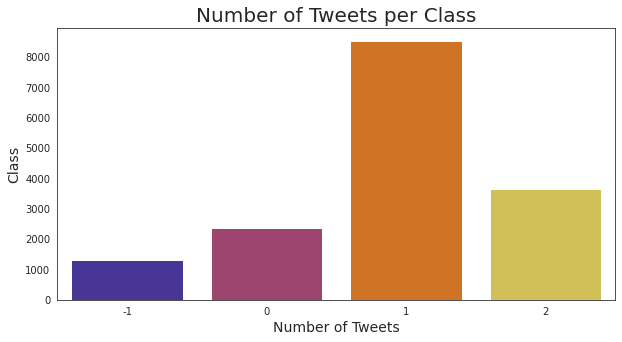

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment',data=df_train, palette='CMRmap')
plt.title('Number of Tweets per Class', fontsize=20)
plt.xlabel('Number of Tweets', fontsize=14)
plt.ylabel('Class', fontsize=14)
plt.show()

We can see from the above histogram that there is an imbalance of classes. The number of observations across the different class labels are unevenly distributed. When we're training our models, it is preferable for all classes to have a relatively even split of observations.

## Checking Relationship between Text Length and Sentiment 

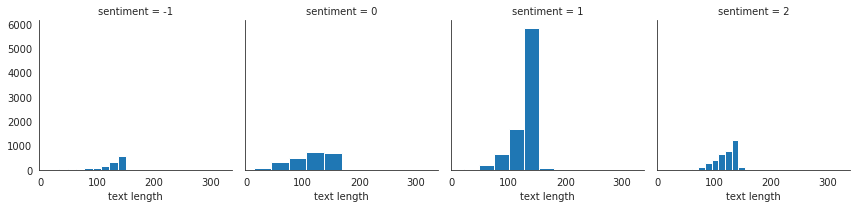

In [65]:
df_train['text length'] = df_train['message'].apply(len)
g = sns.FacetGrid(df_train,col='sentiment')
g.map(plt.hist,'text length')
plt.show()

Here we see that majority of the tweets for all classes are longer in length.

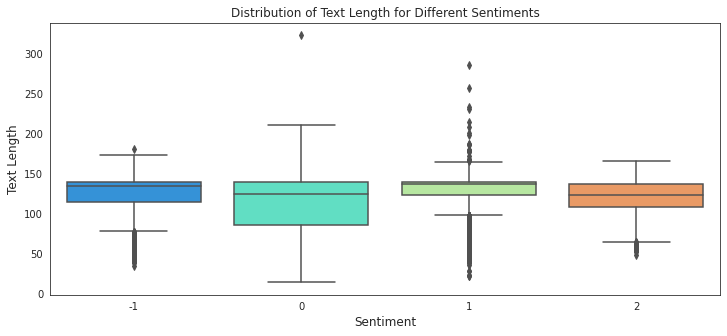

In [66]:
fig,axis = plt.subplots(figsize=(12,5))
sns.boxplot(x='sentiment',y='text length',data=df_train, palette='rainbow')
plt.title('Distribution of Text Length for Different Sentiments', fontsize = 12)
plt.xlabel('Sentiment', fontsize = 12)
plt.ylabel('Text Length', fontsize = 12)
plt.show()

In [67]:
rate = df_train.groupby('sentiment').mean()
rate

,tweetid,text length
sentiment,,
-1,499169.447531,124.121914
0,496550.249894,111.501487
1,507418.550762,129.211489
2,492613.500275,119.946429


We see that tweets in class -1 (the tweet does not believe in man-made climate change) tend to be longer.

In [68]:
rate.corr()

,tweetid,text length
tweetid,1.00000,0.70837
text length,0.70837,1.00000


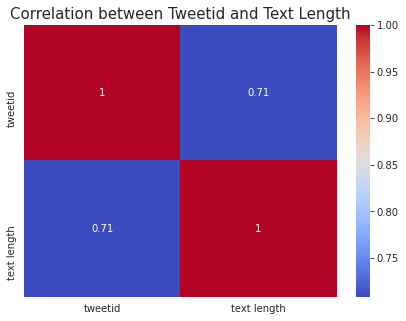

In [69]:
plt.figure(figsize=(7,5))
sns.heatmap(rate.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation between Tweetid and Text Length', fontsize = 15 )
plt.show()

## Understanding Common Words in Tweets

Word Cloud is a data visualization technique used for representing text data whereby the size of each word indicates its frequency or importance. We will be using Word Cloud to anaylze the tweets. 
Since many companies would like to determine how people perceive climate change and whether or not they believe it is a real threat (see Project Description), word clouds can identify patterns that would otherwise be difficult to see in a tabular format.

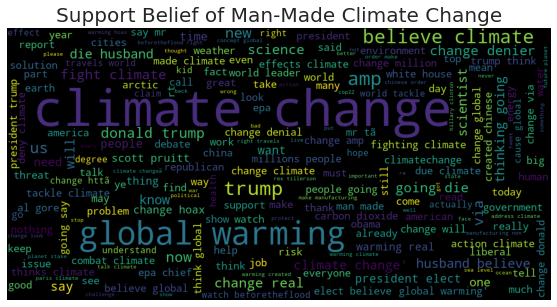

In [70]:
df_pro = df_train[df_train.sentiment==1]
words = ' '.join([text for text in df_train['clean_tweet']])
wordcloud = WordCloud(width = 1000, height = 500).generate(words)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Support Belief of Man-Made Climate Change', fontsize = 20)
plt.show()

For the tweets that are pro the belief of man-made climate change, the words that seem the to be the most important or most frequent are *CLIMATE CHANGE, GLOBAL WARMING.*

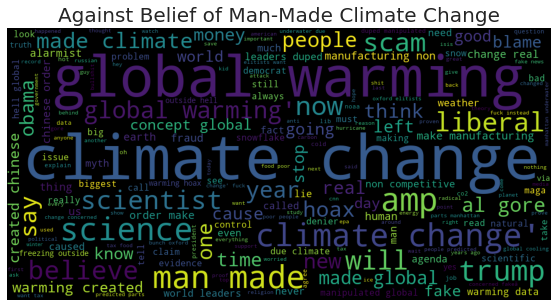

In [71]:
df_anti = df_train[df_train.sentiment==-1]
text= (' '.join(df_anti['clean_tweet']))
wordcloud = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Against Belief of Man-Made Climate Change', fontsize = 20)
plt.show()

For the tweets that are anti climate change, the words that seem the to be the most important or most frequent are *CLIMATE CHANGE*, *GLOBAL WARMING*, *SCIENCE*. It is also interesting to note that word such as *SCAM* and *HOAX* are highlighted as well.

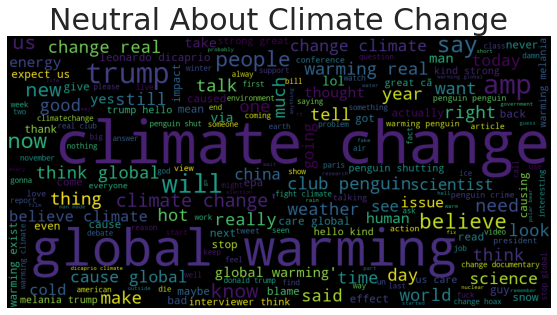

In [72]:
df_neutral = df_train[df_train.sentiment==0]
text= (' '.join(df_neutral['clean_tweet']))
wordcloud = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Neutral About Climate Change', fontsize = 30)
plt.show()

For the tweets that are neutral, the word and phrases *CLIMATE, GLOBAL WARMING, CLIMATE CHANGE* seem to have more importance.

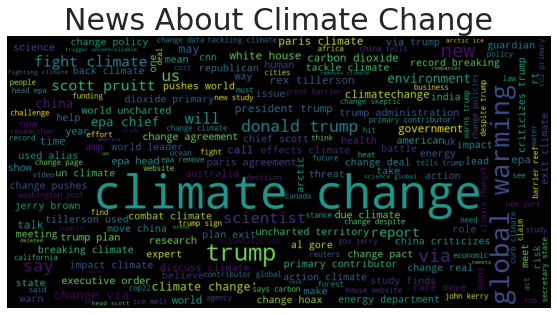

In [73]:
df_factual = df_train[df_train.sentiment==2]
text= (' '.join(df_factual['clean_tweet']))
wordcloud = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('News About Climate Change', fontsize = 30)
plt.show()

Here, we can see that *CLIMATE CHANGE*, *CLIMATE, GLOBAL WARMING* are the most frequently occurring words for the different types of tweets.

## Understanding Relationship of Hashtags and Sentiment of Tweet

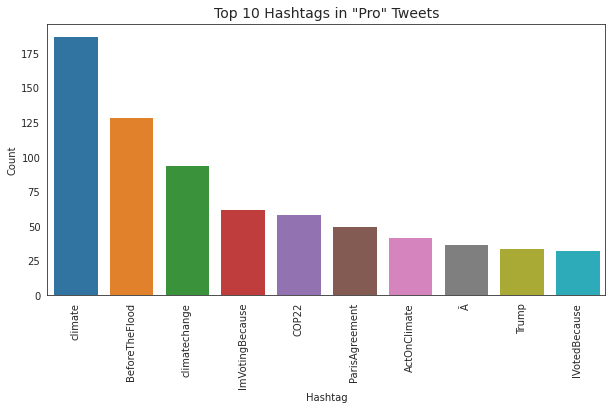

In [74]:
pro_hashtags = []
for message in df_pro['message']:
    hashtag = re.findall(r"#(\w+)", message)
    pro_hashtags.append(hashtag)

pro_hashtags = sum(pro_hashtags,[])
a = nltk.FreqDist(pro_hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10)
plt.title('Top 10 Hashtags in "Pro" Tweets', fontsize=14)
plt.show()

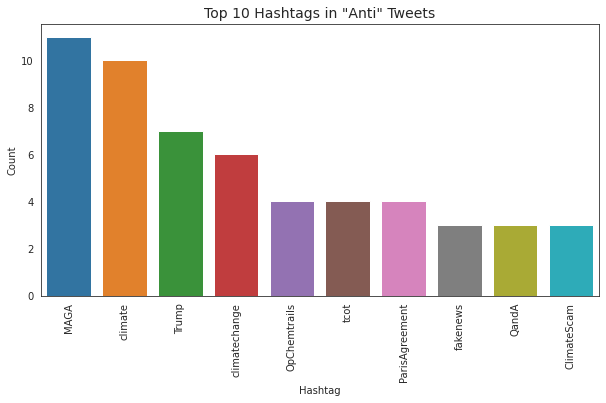

In [75]:
anti_hashtags = []
for message in df_anti['message']:
    hashtag = re.findall(r"#(\w+)", message)
    anti_hashtags.append(hashtag)

anti_hashtags = sum(anti_hashtags,[])


a = nltk.FreqDist(anti_hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10)
plt.title('Top 10 Hashtags in "Anti" Tweets', fontsize=14)
plt.show()

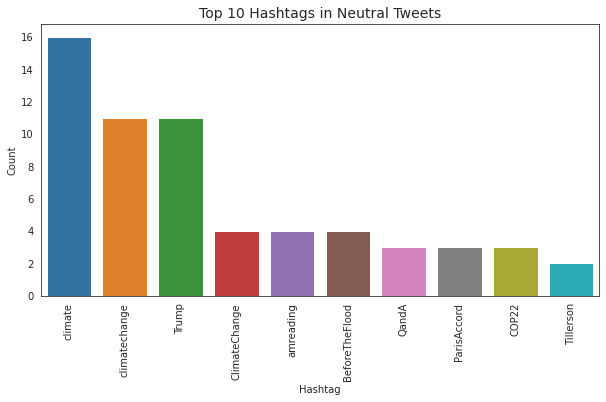

In [76]:
neutral_hashtags = []
for message in df_neutral['message']:
    hashtag = re.findall(r"#(\w+)", message)
    neutral_hashtags.append(hashtag)

neutral_hashtags = sum(neutral_hashtags,[])


a = nltk.FreqDist(neutral_hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10)
plt.title('Top 10 Hashtags in Neutral Tweets', fontsize=14)
plt.show()

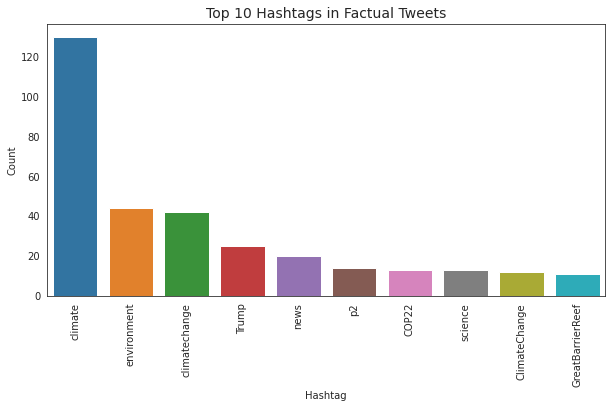

In [77]:
factual_hashtags = []
for message in df_factual['message']:
    hashtag = re.findall(r"#(\w+)", message)
    factual_hashtags.append(hashtag)

factual_hashtags = sum(factual_hashtags,[])


a = nltk.FreqDist(factual_hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10)
plt.title('Top 10 Hashtags in Factual Tweets', fontsize=14)
plt.show()

## Visualizing Tweets with Word2Vec and t-SNE
Word2vec is a two-layer neural network that is designed to processes text, in this case, Twitter Tweets. It's input is a text corpus (ie. Tweet) and its output is a set of vectors: feature vectors for words in that corpus. Word2Vec converts text into a numerical form that can be understood by a machine.

In this step, we take the Tweets and perform tokenization - transforming the word into a numerical representation - prior to visualizing. We pass each tweet (tw.tweet) to be tokenised, with the output being appended to an array. reference : https://leightley.com/visualizing-tweets-with-word2vec-and-t-sne-in-python/

In [78]:
data = df_train.copy()

In [79]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['message']:
        data[col] = data[col].apply(clean_sentence)
    
    return data
data = clean_dataframe(data)
data.head(5)

,sentiment,message,tweetid,clean_tweet,lemmatized_tweet,text length
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,polyscimajor epa chief doesn't think carbon di...,"[polyscimajor, epa, chief, think, carbon, diox...",140
1,1,like lack evidence anthropogenic global warming,126103,it's not like we lack evidence of anthropogeni...,"[like, lack, evidence, anthropogenic, global, ...",62
2,2,rt rawstory researchers say three years act cl...,698562,researchers say we have three years to act on...,"[researcher, say, three, year, act, climate, c...",140
3,1,todayinmaker wired 2016 pivotal year climate ...,573736,#todayinmaker# wired : 2016 was a pivotal year...,"[, todayinmaker, wired, 2016, pivotal, year, w...",99
4,1,rt soynoviodetodas 2016 racist sexist climate ...,466954,"it's 2016, and a racist, sexist, climate chan...","[2016, racist, sexist, climate, change, denyin...",122


In [80]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['message']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['polyscimajor',
  'epa',
  'chief',
  'doesnt',
  'think',
  'carbon',
  'dioxide',
  'main',
  'cause',
  'global',
  'warming',
  'wait',
  'httpstcoyelvcefxkc',
  'via',
  'mashable'],
 ['like', 'lack', 'evidence', 'anthropogenic', 'global', 'warming']]

In [81]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['warming']

array([ 0.28732055,  0.11237556, -0.21073781,  0.08677566, -0.16411169,
       -0.36561748,  0.18638954,  0.02531861,  0.235993  ,  0.2869949 ,
        0.15550448, -0.10070505,  0.17873421, -0.16076274,  0.21167418,
        0.06321635,  0.34784666, -0.0534592 , -0.26117942,  0.35965618,
        0.15016747, -0.03937123, -0.15372714,  0.20423089, -0.10155229,
       -0.2807357 ,  0.10488939,  0.01987253, -0.37174776, -0.13909759,
       -0.15731141,  0.23093586, -0.16553774, -0.01185302,  0.18006648,
        0.07775825, -0.00665739,  0.18963602,  0.01906279, -0.24213494,
       -0.38520703,  0.02572758, -0.18489106,  0.30345368,  0.2424607 ,
       -0.07487411,  0.1981601 , -0.00192299,  0.23468457,  0.11046892,
       -0.19172978, -0.02114571,  0.09179711, -0.26253504,  0.13160343,
       -0.09750662, -0.09701887, -0.19371402, -0.00282559, -0.19518957,
       -0.09033575,  0.1848287 , -0.1108404 ,  0.29566592,  0.22961459,
        0.07148434, -0.5542609 , -0.22880454, -0.04567259,  0.15

In [82]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(13, 7)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


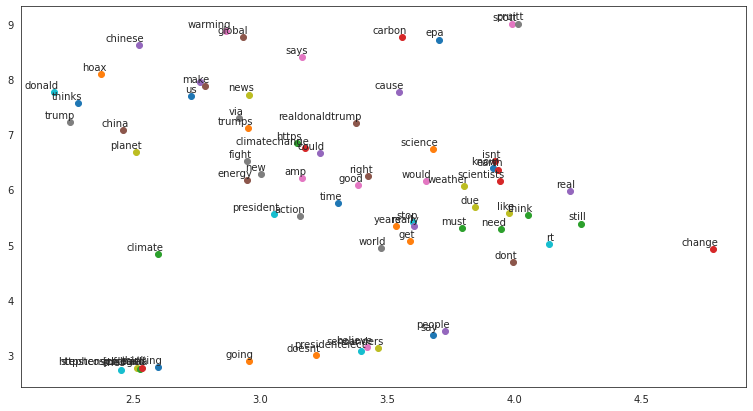

In [83]:
tsne_plot(model)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


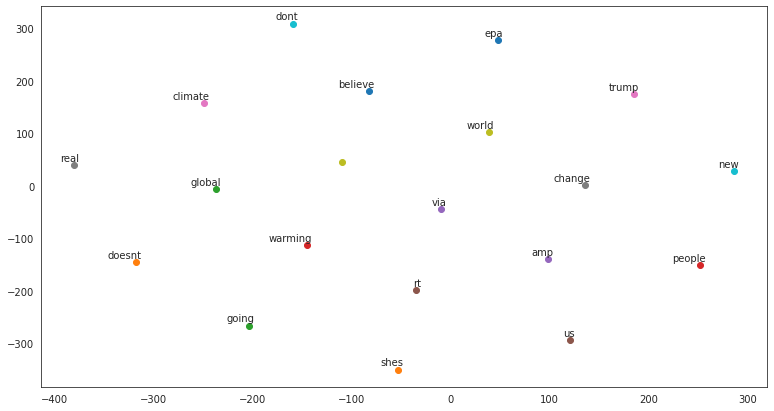

In [84]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

In [85]:
df_train = df_train.drop(['text length'],axis=1)

<a id="preprocessing"></a>
# 5. Data Preprocessing

For our modelling process, we will be modelling on unbalanced data and balanced and see which model performed better. Therefore, we will have two training and testing sets, one for the unbalanced data and one for the resampled data.

First we go through a process called vectorizarition or feature extraction. We will be using TF-IDF vectorizer to convert text to word frequency vectors.
Term Frequency – Inverse Document (TF-IDF) are word frequency scores that try to highlight words that are more interesting, eg. more frequent. This is important to prepare text data for predictive modelling. The words need to be encoded as numbers (integers or floating point values) to use as input to a machine learning algorithm. 

Then we split data into a training set, testing data and validation data:
* Training set (X_train and y_train): Data that contains a known output and the model learns on this data.
* Validation data (y_test): This data is used to assess how well the algorithm was trained with the training data.
* Test data (X_test) Data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [86]:
combi = df_train.append(df_test, ignore_index=True)

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(combi['message'])

train = tfidf[:15819,:]
test = tfidf[15819:,:]

X_tfidf = train
y_tfidf = df_train['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf,  random_state=42, test_size=0.1)

## Dealing with Unbalanced data

Above we mentioned that the classes are imbalanced, the number of observations for the classes are unevenly distributed. An imbalanced dataset will lead a model to get good results by returning the majority. We will therefore resample the data by downsampling the majority classes and upsampling the minority classes. Downsampling is the process of taking a random subset of the majority class and matching it to the minority class. Upsampling is the process of taking random samples from the minority class until we have as many observations as the majority class.

In [87]:
df = df_train.copy()

# Separate majority and minority classes
df_majority = df[df.sentiment==1]
df_minority = df[(df.sentiment==-1) | (df.sentiment==0) | (df.sentiment==2)]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample without replacement
                                 n_samples=7000,     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.sentiment.value_counts()

 1    7000
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [88]:
# Separate majority and minority classes
df_majority = df_downsampled[(df_downsampled.sentiment==1) | (df_downsampled.sentiment==0) | (df_downsampled.sentiment==2)]
df_minority = df_downsampled[df_downsampled.sentiment==-1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.sentiment.value_counts()

 1    7000
-1    4000
 2    3640
 0    2353
Name: sentiment, dtype: int64

In [89]:
# Separate majority and minority classes
df_majority = df_upsampled[(df_upsampled.sentiment==1) | (df_upsampled.sentiment==-1) | (df_upsampled.sentiment==2)]
df_minority = df_upsampled[df_upsampled.sentiment==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
up_sampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
up_sampled.sentiment.value_counts()

 1    7000
-1    4000
 0    4000
 2    3640
Name: sentiment, dtype: int64

In [90]:
# Separate majority and minority classes
df_majority = up_sampled[(up_sampled.sentiment==1) | (up_sampled.sentiment==-1) | (up_sampled.sentiment==0)]
df_minority = up_sampled[up_sampled.sentiment==2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
resampled_data = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
resampled_data.sentiment.value_counts()

 1    7000
-1    4000
 2    4000
 0    4000
Name: sentiment, dtype: int64

In [91]:
#Create training test and testing set for the resampled data
resampled_data = resampled_data.append(df_test, ignore_index=True)
tfidf_vectorizer1 = TfidfVectorizer()
tfidf_resam = tfidf_vectorizer1.fit_transform(resampled_data['message'])
train_resam = tfidf_resam[:19000,:]
test_resam = tfidf_resam[19000:,:]

X_resampled = train_resam
y_resampled = resampled_data.iloc[:19000,:]['sentiment']
X_train_resam, X_test_resam, y_train_resam, y_test_resam = train_test_split(X_resampled, y_resampled, test_size=0.1)

<a id="modelling"></a>
# 6. Modelling

**For each model in this section, we will:**

* Train model on unbalanced data
* Train model on balanced data
* Perform GridSearch to find best parameters for each model

## Linear Support Vector

A linear SVC (Support Vector Classifier) fits to the data and returns a best fit hyperplane that categorizes the data. Thereafter, we can feed some features to the model to see what the predicted class is. 

In [92]:
modelstart= time.time()

classifier1 = LinearSVC()
classifier2 = LinearSVC()

#Fitting to Unbalanced data
lvc1 = classifier1.fit(X_train,y_train)
ypred_lvc1 = lvc1.predict(X_test)
lvc_score1 = f1_score(y_test, ypred_lvc1, average='macro')
precision_lvc1 = precision_score(y_test, ypred_lvc1, average='macro')
recall_lvc1 = recall_score(y_test, ypred_lvc1, average='macro')

#Fitting to Balanced data
lvc2 = classifier2.fit(X_train_resam,y_train_resam)
ypred2 = lvc2.predict(X_test_resam)
lvc_score2 = f1_score(y_test_resam, ypred2, average='macro')
precision_lvc2 = precision_score(y_test_resam, ypred2,average='macro')
recall_lvc2 = recall_score(y_test_resam, ypred2, average='macro')

print("Testing: Linear Support Vector")
print('F1 Score on unbalanced data', lvc_score1)
print('F1 Score on balanced data', lvc_score2)
print('Recall Score on unbalanced data', recall_lvc1)
print('Recall Score on balanced data', recall_lvc2)
print('PrecisionScore on unbalanced data', precision_lvc1)
print('Precision Score on balanced data', precision_lvc2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

Testing: Linear Support Vector
F1 Score on unbalanced data 0.6890668450697314
F1 Score on balanced data 0.9137757799944881
Recall Score on unbalanced data 0.6616564532954736
Recall Score on balanced data 0.913829726099915
PrecisionScore on unbalanced data 0.7364886124050899
Precision Score on balanced data 0.9137313100132665
Model Runtime: 0.79 seconds


### GridSearch

In [93]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Unbalanced 
# create the grid
max_iter = [100,500,1000,2000,5000]
C = [1,10,50,100,200]
param_grid = dict(C =C ,max_iter=max_iter)


# search the grid
grid = GridSearchCV(estimator=lvc1, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=0,
                    n_jobs=-1)


lvc_best = grid.fit(X_train, y_train)
lvc_estimator = grid.best_estimator_
lvc_parameters = grid.best_params_
lvc_score = grid.best_score_

print('Linear Support Vector on Unbalanced Data')
print('Best Estimator: ', lvc_estimator)
print('Best Parameter: ', lvc_parameters)
print('Best Score: ', lvc_score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear Support Vector on Unbalanced Data
Best Estimator:  LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Best Parameter:  {'C': 10, 'max_iter': 100}
Best Score:  0.6328371674557731


In [94]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Balanced 
# create the grid
max_iter = [100,500,1000,2000,5000]
C = [1,10,50,100,200]
param_grid = dict(C =C ,max_iter=max_iter)


# search the grid
grid = GridSearchCV(estimator=lvc2, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=0,
                    n_jobs=-1)


lvc_best = grid.fit(X_train_resam, y_train_resam)
lvc_estimator = grid.best_estimator_
lvc_parameters = grid.best_params_
lvc_score = grid.best_score_

print('Linear Support Vector on Balanced Data')
print('Best Estimator: ', lvc_estimator)
print('Best Parameter: ', lvc_parameters)
print('Best Score: ', lvc_score)

Linear Support Vector on Balanced Data
Best Estimator:  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Best Parameter:  {'C': 1, 'max_iter': 100}
Best Score:  0.8394175399240831


## Logistic Regression

In [95]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df_train['scores'] = df_train['message'].apply(lambda message: sid.polarity_scores(message))
df_train['compound']  = df_train['scores'].apply(lambda score_dict: score_dict['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [96]:
modelstart= time.time()
lr_classifier1 = LogisticRegression(solver='lbfgs')
lr_classifier2 = LogisticRegression(solver='lbfgs')

#Fitting on Unbalanced data
lr_model1 = lr_classifier1.fit(X_train, y_train)
predictions_lr1 = lr_classifier1.predict(X_test)
lr_score1 = f1_score(y_test, predictions_lr1, average='macro')
precision_lr1 = precision_score(y_test, predictions_lr1, average='macro')
recall_lr1 = recall_score(y_test, predictions_lr1, average='macro')

#Fitting on Balanced data
lr_model2 = lr_classifier2.fit(X_train_resam,y_train_resam)
predictions_lr2 = lr_classifier2.predict(X_test_resam)
lr_score2 = f1_score(y_test_resam, predictions_lr2, average='macro')
precision_lr2 = precision_score(y_test_resam, predictions_lr2, average='macro')
recall_lr2 = recall_score(y_test_resam, predictions_lr2, average='macro')


print("Testing: Logistic Regression")
print('F1 Score on unbalanced data: ',lr_score1)
print('F1 Score on balanced data: ', lr_score2)
print('Recall Score on unbalanced data: ',recall_lr1)
print('Recall Score on balanced data: ', recall_lr2)
print('Precision Score on unbalanced data: ',precision_lr1)
print('Precision Score on balanced data: ', precision_lr2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Testing: Logistic Regression
F1 Score on unbalanced data:  0.6185273513572633
F1 Score on balanced data:  0.8484115285988872
Recall Score on unbalanced data:  0.5775861506403754
Recall Score on balanced data:  0.8408821743031356
Precision Score on unbalanced data:  0.7599392117193061
Precision Score on balanced data:  0.8584415021784871
Model Runtime: 9.16 seconds


### Grid Search

In [97]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Unbalanced 
# create the grid
C = np.logspace(-3,3,7)
penalty = ["l1","l2"]
param_grid = dict(C =C ,penalty = penalty)


# search the grid
grid = GridSearchCV(estimator=lr_model1, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=0,
                    n_jobs=-1)


lr_best = grid.fit(X_train, y_train)
lr_estimator = grid.best_estimator_
lr_parameters = grid.best_params_
lr_score = grid.best_score_

print('Logistic Regression on Unbalanced Data')
print('Best Estimator: ', lr_estimator)
print('Best Parameter: ', lr_parameters)
print('Best Score: ', lr_score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression on Unbalanced Data
Best Estimator:  LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best Parameter:  {'C': 1000.0, 'penalty': 'l2'}
Best Score:  0.6366041356623591


In [98]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Balanced 
# create the grid
C = np.logspace(-3,3,7)
penalty = ["l1","l2"]
param_grid = dict(C =C ,penalty = penalty)


# search the grid
grid = GridSearchCV(estimator=lr_model2, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=0,
                    n_jobs=-1)


lr_best = grid.fit(X_train_resam, y_train_resam)
lr_estimator = grid.best_estimator_
lr_parameters = grid.best_params_
lr_score = grid.best_score_

print('Logistic Regression on Balanced Data')
print('Best Estimator: ', lr_estimator)
print('Best Parameter: ', lr_parameters)
print('Best Score: ', lr_score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression on Balanced Data
Best Estimator:  LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best Parameter:  {'C': 100.0, 'penalty': 'l2'}
Best Score:  0.8434973689259768


## K-Nearest Neighbours

K-Nearest Neighbours works by:

1. Choosing K (number of neighbours)
2. Choosing distance metric 
3. For each data point  $X_{test}$  in the testing data and for each data point  $X_{train}$    in the training data calculate the distance between the test point and training point. Then find the labels of the K closest poins to  $X_{test}$  and assign the mode label to  $X_{test}$.

In [99]:
modelstart= time.time()

KNN_classifier1 = KNeighborsClassifier()
KNN_classifier2 = KNeighborsClassifier()

knn_model1 = KNN_classifier1.fit(X_train, y_train)
predictions_knn1 = KNN_classifier1.predict(X_test)
knn_score1 = f1_score(y_test, predictions_knn1, average='macro')
recall_knn1 = recall_score(y_test, predictions_knn1, average='macro')
precision_knn1 = precision_score(y_test, predictions_knn1, average='macro')

knn_model2 = KNN_classifier2.fit(X_train_resam,y_train_resam)
predictions_knn2 = KNN_classifier2.predict(X_test_resam)
knn_score2 = f1_score(y_test_resam, predictions_knn2, average='macro')
recall_knn2 = recall_score(y_test_resam, predictions_knn2, average='macro')
precision_knn2 = precision_score(y_test_resam, predictions_knn2, average='macro')


print("Testing: K-Nearest Neighbors")
print('F1 Score on unbalanced data: ', knn_score1)
print('F1 Score on balanced data: ', knn_score2)
print('Recall Score on unbalanced data: ', recall_knn1)
print('Recall Score on balanced data: ', recall_knn2)
print('Precision Score on unbalanced data: ', precision_knn1)
print('Precision Score on balanced data: ', precision_knn2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

Testing: K-Nearest Neighbors
F1 Score on unbalanced data:  0.5736667094545617
F1 Score on balanced data:  0.7205985402811046
Recall Score on unbalanced data:  0.5554476884063806
Recall Score on balanced data:  0.7244566103528843
Precision Score on unbalanced data:  0.6012068142775339
Precision Score on balanced data:  0.7194755446021195
Model Runtime: 2.88 seconds


### Grid Search

In [100]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Unbalanced 
# create the grid
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]
param_grid = dict(n_neighbors = n_neighbors)

# search the grid
grid = GridSearchCV(estimator=knn_model2, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 5,
                    verbose=0,
                    n_jobs=-1)

knn_best = grid.fit(X_train_resam, y_train_resam)
knn_estimator = grid.best_estimator_
knn_parameters = grid.best_params_
knn_score = grid.best_score_

print('K-Nearest Neighbours on Balanced Data')
print('Best Estimator: ', knn_estimator)
print('Best Parameter: ', knn_parameters)
print('Best Score: ', knn_score)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


K-Nearest Neighbours on Balanced Data
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Best Parameter:  {'n_neighbors': 1}
Best Score:  0.8637898518828223


# Random Forest

Random Forest is ensemble method built on decision trees. It aggregates the results of an ensemble of decision trees.

In [101]:
modelstart= time.time()
rf1 = RandomForestClassifier(n_estimators=200, random_state=11)
rf2 = RandomForestClassifier(n_estimators=200, random_state=11)
 
#Training on Unbalanced data    
rf_model1 = rf1.fit(X_train, y_train)
predictions_rf1 = rf1.predict(X_test)
rf_score1 = f1_score(y_test, predictions_rf1, average='macro')
recall_rf1 = recall_score(y_test, predictions_rf1, average='macro')
precision_rf1 = precision_score(y_test, predictions_rf1, average='macro')

#Training on Balanced data
rf_model2 = rf2.fit(X_train_resam,y_train_resam)
predictions_rf2 = rf2.predict(X_test_resam)
rf_score2 = f1_score(y_test_resam, predictions_rf2, average='macro')
recall_rf2 = recall_score(y_test_resam, predictions_rf2, average='macro')
precision_rf2 = precision_score(y_test_resam, predictions_rf2, average='macro')

print("Testing: Random Forest")
print('F1 Score on unbalanced data: ', rf_score1)
print('F1 Score on balanced data: ', rf_score2)
print('Recall Score on unbalanced data: ', recall_rf1)
print('Recall Score on balanced data: ', recall_rf2)
print('Precision Score on unbalanced data: ', precision_rf1)
print('Precision Score on balanced data: ', precision_rf2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

Testing: Random Forest
F1 Score on unbalanced data:  0.563360431433654
F1 Score on balanced data:  0.9189120561428189
Recall Score on unbalanced data:  0.5234435413859359
Recall Score on balanced data:  0.91206240968221
Precision Score on unbalanced data:  0.7723075099964245
Precision Score on balanced data:  0.9271777341348716
Model Runtime: 182.76 seconds


### Grid Search

In [102]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Unbalanced 
# create the grid
n_estimators = [100, 1000, 2000]
max_features = [1, 3, 5]
max_depth = [5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)


# search the grid
grid = GridSearchCV(estimator=rf_model1, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=2,
                    n_jobs=-1)


rf_best = grid.fit(X_train_resam, y_train_resam)
rf_estimator = grid.best_estimator_
rf_parameters = grid.best_params_
rf_score = grid.best_score_

print('Random Forest on Unbalanced Data')
print('Best Estimator: ', rf_estimator)
print('Best Parameter: ', rf_parameters)
print('Best Score: ', rf_score)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.9min finished


Random Forest on Unbalanced Data
Best Estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)
Best Parameter:  {'max_depth': 20, 'n_estimators': 2000}
Best Score:  0.43504034789913343


In [103]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Balanced 
# create the grid
n_estimators = [100, 1000, 2000]
max_features = [1, 3, 5]
max_depth = [5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)


# search the grid
grid = GridSearchCV(estimator=rf_model2, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=2,
                    n_jobs=-1)


rf_best = grid.fit(X_train, y_train)
rf_estimator = grid.best_estimator_
rf_parameters = grid.best_params_
rf_score = grid.best_score_

print('Random Forest on Balanced Data')
print('Best Estimator: ', rf_estimator)
print('Best Parameter: ', rf_parameters)
print('Best Score: ', rf_score)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.8min finished


Random Forest on Balanced Data
Best Estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)
Best Parameter:  {'max_depth': 20, 'n_estimators': 100}
Best Score:  0.23130243400201395


## Decision Tree

Decision Trees can be explained by two entities, decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split. A decsion tree predictive model goes from an observation of a point to (represented in the branches) to conclusions about the target value.

In [104]:
modelstart= time.time()
dt_classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

dt_model1 = dt_classifier1.fit(X_train, y_train)
predictions_dt1 = dt_classifier1.predict(X_test)
dt_score1 = f1_score(y_test, predictions_dt1, average='macro')
recall_dt1 = recall_score(y_test, predictions_dt1, average='macro')
precision_dt1 = precision_score(y_test, predictions_dt1, average='macro')

dt_model2 = dt_classifier2.fit(X_train_resam,y_train_resam)
predictions_dt2 = dt_classifier2.predict(X_test_resam)
dt_score2 = f1_score(y_test_resam, predictions_dt2, average='macro')
recall_dt2 = recall_score(y_test_resam, predictions_dt2, average='macro')
precision_dt2 = precision_score(y_test_resam, predictions_dt2, average='macro')

print("Testing: Decision Tree")
print('F1 Score on unbalanced data: ', dt_score1)
print('F1 Score on balanced data: ', dt_score2)
print('Recall Score on unbalanced data: ', recall_dt1)
print('Recall Score on balanced data: ', recall_dt2)
print('Precision Score on unbalanced data: ', precision_dt1)
print('Precision Score on balanced data: ', precision_dt2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

Testing: Decision Tree
F1 Score on unbalanced data:  0.510445722935994
F1 Score on balanced data:  0.8698697100688884
Recall Score on unbalanced data:  0.5106090992399646
Recall Score on balanced data:  0.8759562367656064
Precision Score on unbalanced data:  0.5110751224880575
Precision Score on balanced data:  0.8652586514385784
Model Runtime: 10.94 seconds


### Grid Search

In [105]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Unbalanced 
# create the grid
max_depth = [5, 10, 20,100,200]
param_grid = dict(max_depth=max_depth)

# search the grid
grid = GridSearchCV(estimator=dt_model1, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv=2,
                    verbose=2,
                    n_jobs=-1)

dt_best = grid.fit(X_train, y_train)
dt_estimator = grid.best_estimator_
dt_parameters = grid.best_params_
dt_score = grid.best_score_

print('Decision Tree on Unbalanced Data')
print('Best Estimator: ', dt_estimator)
print('Best Parameter: ', dt_parameters)
print('Best Score: ', dt_score)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.1s finished


Decision Tree on Unbalanced Data
Best Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
Best Parameter:  {'max_depth': 100}
Best Score:  0.4805839622827618


In [107]:
#Create Scorer
f1 = make_scorer(f1_score , average='macro')

#Balanced 
# create the grid
max_depth = [5, 10, 20,100,200]
param_grid = dict(max_depth=max_depth)

# search the grid
grid = GridSearchCV(estimator=dt_model2, 
                    param_grid=param_grid,
                    scoring = f1,
                    cv= 2,
                    verbose=2,
                    n_jobs=-1)

dt_best = grid.fit(X_train_resam, y_train_resam)
dt_estimator = grid.best_estimator_
dt_parameters = grid.best_params_
dt_score = grid.best_score_

print('Decision Tree on Balanced Data')
print('Best Estimator: ', dt_estimator)
print('Best Parameter: ', dt_parameters)
print('Best Score: ', dt_score)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.6s finished


Decision Tree on Balanced Data
Best Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
Best Parameter:  {'max_depth': 100}
Best Score:  0.7546303502723148


<a id="evaluation"></a>
# 7. Performance Evaluation

We will compare the performance of the models using the precision, recall, precision.

#### Precision:
Precision can be defined as the sum of true positives across all classes divided by the sum of true positives and false positives across all classes. Precision answers the question: what proportion of the predicted positves is indeed postive.

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$


#### Recall:
Recall can be defined as he sum of true positives across all classes divided by the sum of true positives and false negatives across all classes. Recall answers the question: what proportion of actual positives is correctly classified?

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

#### F1 Score:
$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$
The higher the f1 score is, the better the fit of the model

## Compare Models on Performance Metrics

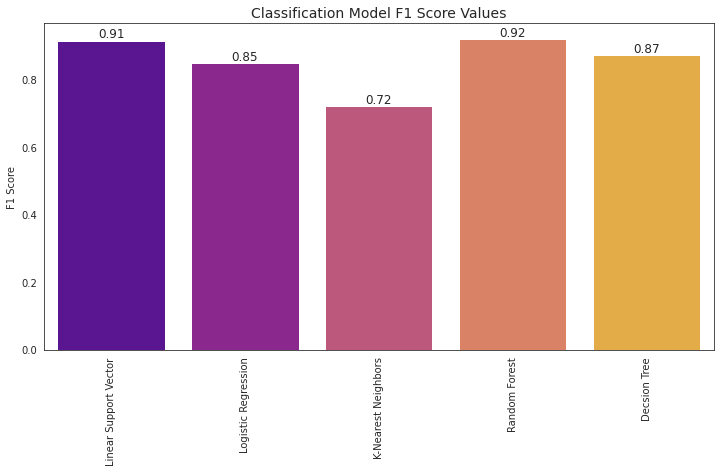

In [108]:
# Compare F1_score values between models
fig,axis = plt.subplots(figsize=(12, 6))
f1_x = ['Linear Support Vector','Logistic Regression','K-Nearest Neighbors','Random Forest','Decsion Tree']
f1_y = [lvc_score2,lr_score2,knn_score2,rf_score2,dt_score2]
ax = sns.barplot(x=f1_x, y=f1_y,palette='plasma')
plt.title('Classification Model F1 Score Values',fontsize=14)
plt.ylabel('F1 Score')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
plt.show()

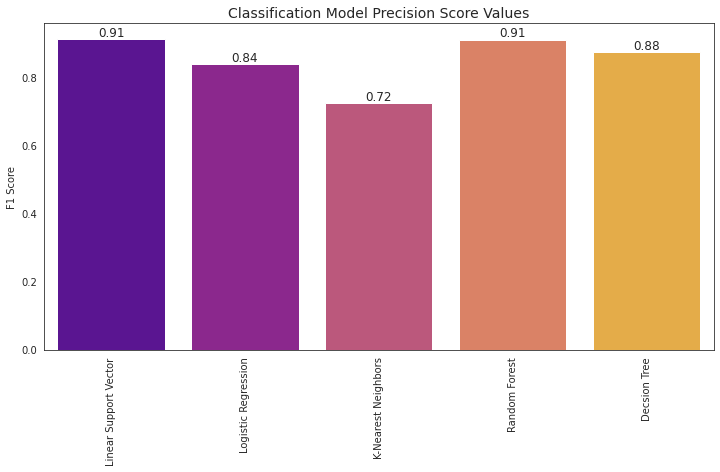

In [109]:
# Compare Precision score values between models
fig,axis = plt.subplots(figsize=(12, 6))
f1_x = ['Linear Support Vector','Logistic Regression','K-Nearest Neighbors','Random Forest','Decsion Tree']
f1_y = [recall_lvc2,recall_lr2,recall_knn2,recall_rf2,recall_dt2]
ax = sns.barplot(x=f1_x, y=f1_y,palette='plasma')
plt.title('Classification Model Precision Score Values',fontsize=14)
plt.ylabel('F1 Score')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
plt.show()

## Evaluate Models By Cross Validation

Cross validation is used to test the accuracy of a model's prediction on unseen data (validation sets). This is important because it can assist in picking up issues such as over/underfititng and selection bias. We used the K-fold technique to perform cross validation.

In [110]:
f1 = make_scorer(f1_score , average='macro')
classifier = [RandomForestClassifier(n_estimators = 2000, max_depth = 20),LinearSVC(C = 1, max_iter = 500)]
cross_val = []
for c in classifier:
    cross_val.append(np.sqrt(abs(cross_val_score(c, X_train, y=y_train, scoring= f1, cv=KFold(n_splits=5, random_state=0, shuffle=True)))))
cross_val_mean = [i.mean() for i in cross_val] 
cross_val_df = pd.DataFrame({"Model": ["RandomForest", "LinearSVC"],"F1 Score": cross_val_mean})
pd.DataFrame(cross_val_df.sort_values("F1 Score", ascending=True))

,Model,F1 Score
0,RandomForest,0.474105
1,LinearSVC,0.813921


<a id="analysis"></a>
# 8. Model Analysis

Because of the f1 score and runtime of the models, we choose the Linear Support Vector as our final model on the unbalanced data set 

In [111]:
#RUN MODEL AGAIN
modelstart= time.time()
final_model = LinearSVC(C = 1, max_iter = 500, penalty = 'l2')
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
final_score = f1_score(y_test, y_pred_final, average = 'macro')
print("Testing: Linear Support Vector")
print('Final F1 Score: ', final_score)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))

Testing: Linear Support Vector
Final F1 Score:  0.6890668450697314
Model Runtime: 0.35 seconds


In [112]:
print(metrics.classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

          -1       0.72      0.50      0.59       126
           0       0.66      0.46      0.54       224
           1       0.80      0.88      0.84       895
           2       0.77      0.81      0.79       337

    accuracy                           0.77      1582
   macro avg       0.74      0.66      0.69      1582
weighted avg       0.77      0.77      0.77      1582



In [113]:
print(metrics.confusion_matrix(y_test,y_pred_final))

[[ 63  16  42   5]
 [  7 102 103  12]
 [ 14  32 786  63]
 [  4   5  54 274]]


In [114]:
print(metrics.accuracy_score(y_test,y_pred_final))

0.7743362831858407


<a id="conclusion"></a>
# 9. Conclusion

We were successful in building a model that is able to predict the sentiment of a tweet. We tested five different models for this task and chose the the one with an F1 Score that is above 0.7.
Linear Support Vector delivered the best F1 score based on our test sets.


<a id="save"></a>
# 10. Save Model and Output

In [115]:
#SUBMISSION TO KAGGLE
submission = final_model.predict(test)
df_test['sentiment'] = submission
df_test.sentiment = df_test.sentiment.astype(int)
final_submission = df_test[['tweetid','sentiment']]
final_submission.to_csv('submission.csv', index=False)